In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# reading data 
df = pd.read_csv("visualisation_data.csv")

In [6]:
df.shape

(541010, 11)

In [7]:
# first 5 rows
df.head(5)

,Unnamed: 0,LocationID,time,month,dayofweek,hour,temperature_2m (°C),rain (mm),snowfall (cm),windspeed_10m (km/h),total_people
0,0,24,2022-02-01 00:00:00,2,1,0,-5.8,0.0,0.0,10.3,39.0
1,1,24,2022-02-01 01:00:00,2,1,1,-7.1,0.0,0.0,11.0,14.0
2,2,24,2022-02-01 02:00:00,2,1,2,-8.6,0.0,0.0,11.5,8.0
3,3,24,2022-02-01 03:00:00,2,1,3,-9.8,0.0,0.0,12.0,8.0
4,4,24,2022-02-01 07:00:00,2,1,7,-12.0,0.0,0.0,9.8,259.0


In [8]:
# dropping unnamed column
df = df.drop("Unnamed: 0", 1)

/var/folders/6b/tc94k9n157g920l0_fmhzz000000gn/T/ipykernel_70024/3833849575.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("Unnamed: 0", 1)


In [9]:
# first 5 rows 
df.head(5)

,LocationID,time,month,dayofweek,hour,temperature_2m (°C),rain (mm),snowfall (cm),windspeed_10m (km/h),total_people
0,24,2022-02-01 00:00:00,2,1,0,-5.8,0.0,0.0,10.3,39.0
1,24,2022-02-01 01:00:00,2,1,1,-7.1,0.0,0.0,11.0,14.0
2,24,2022-02-01 02:00:00,2,1,2,-8.6,0.0,0.0,11.5,8.0
3,24,2022-02-01 03:00:00,2,1,3,-9.8,0.0,0.0,12.0,8.0
4,24,2022-02-01 07:00:00,2,1,7,-12.0,0.0,0.0,9.8,259.0


In [10]:
df.dtypes

LocationID                int64
time                     object
month                     int64
dayofweek                 int64
hour                      int64
temperature_2m (°C)     float64
rain (mm)               float64
snowfall (cm)           float64
windspeed_10m (km/h)    float64
total_people            float64
dtype: object

In [12]:
df.dtypes

LocationID                int64
time                     object
month                     int64
dayofweek                 int64
hour                      int64
temperature_2m (°C)     float64
rain (mm)               float64
snowfall (cm)           float64
windspeed_10m (km/h)    float64
total_people            float64
dtype: object

# Pair  and Correlation Plots
## References
- https://stackoverflow.com/questions/58941482/why-am-i-getting-two-plots-instead-of-one-in-a-jupyter-notebook
- https://stackoverflow.com/questions/21487329/add-x-and-y-labels-to-a-pandas-plot
- https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
- https://sparkbyexamples.com/pandas/pandas-aggregate-functions-with-examples/?expand_article=1

## Total People and Day of Week

In [14]:
# total number of people each day
sum_people = df.groupby(df["dayofweek"]).agg({"total_people" : "sum"})

In [15]:
# reseting index
sum_people.reset_index()

,dayofweek,total_people
0,0,80265617.0
1,1,92194285.0
2,2,93170516.0
3,3,93858613.0
4,4,91054839.0
5,5,67738230.0
6,6,53383443.0


In [16]:
# average number of people each day
avg_people = df.groupby(df["dayofweek"]).agg({"total_people" : "mean"})

In [17]:
# reseting index
avg_people.reset_index()

,dayofweek,total_people
0,0,1048.168732
1,1,1192.018476
2,2,1217.342375
3,3,1219.592419
4,4,1170.340595
5,5,865.199893
6,6,688.809731


Text(0, 0.5, 'Total Number of People')

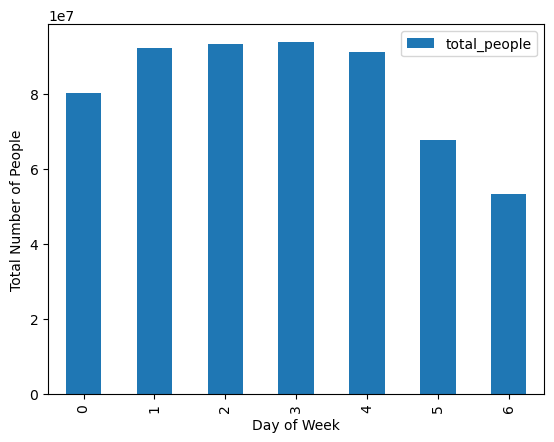

In [18]:
sum_people_plot = sum_people.plot(kind = "bar")
sum_people_plot.set_xlabel("Day of Week")
sum_people_plot.set_ylabel("Total Number of People")

Text(0, 0.5, 'Average Number of People')

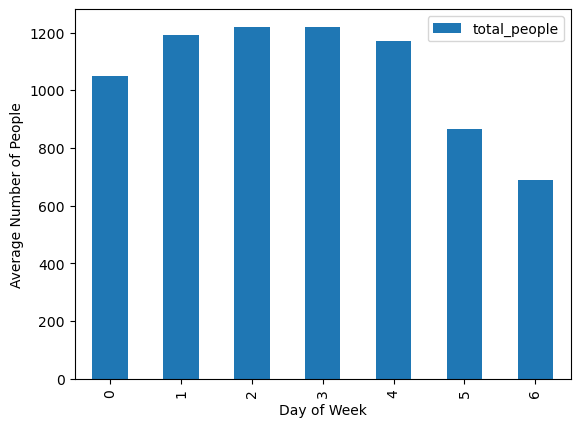

In [19]:
avg_people_plot = avg_people.plot(kind = "bar")
avg_people_plot.set_xlabel("Day of Week")
avg_people_plot.set_ylabel("Average Number of People")

## Total people and hour

In [20]:
# average number of people each hour
avg_people_hourly = df.groupby(df["hour"]).agg({"total_people" : "mean"})

Text(0, 0.5, 'Average Number of People')

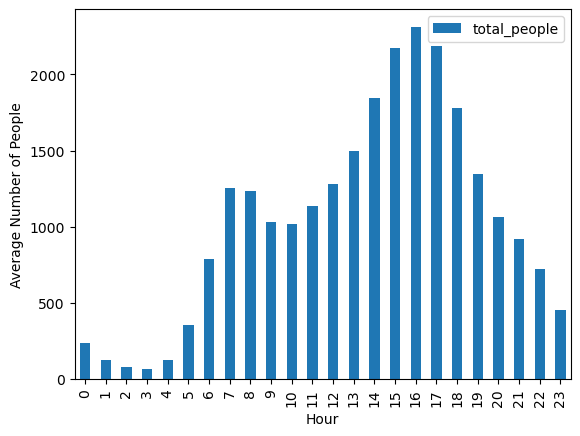

In [21]:
avg_people_hourly_plot = avg_people_hourly.plot(kind = "bar")
avg_people_hourly_plot.set_xlabel("Hour")
avg_people_hourly_plot.set_ylabel("Average Number of People")

## Total People and Month

In [22]:
# average number of people each month
avg_people_monthly = df.groupby(df["month"]).agg({"total_people" : "mean"})

Text(0, 0.5, 'Average Number of People')

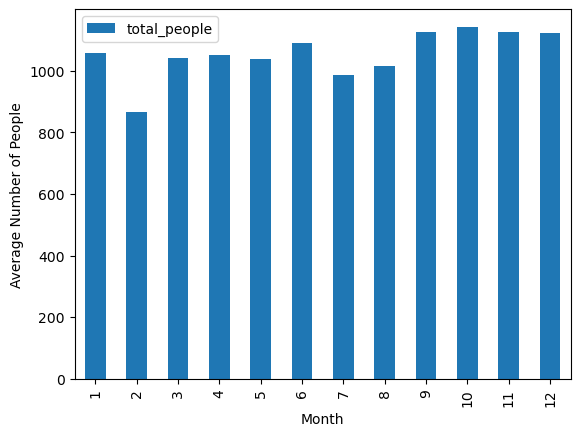

In [23]:
avg_people_monthly_plot = avg_people_monthly.plot(kind = "bar")
avg_people_monthly_plot.set_xlabel("Month")
avg_people_monthly_plot.set_ylabel("Average Number of People")

## Total People and Location ID

In [24]:
# sum of people for each location
sum_people_loc = df.groupby(df["LocationID"]).agg({"total_people" : "sum"})

Text(0, 0.5, 'Total Number of People')

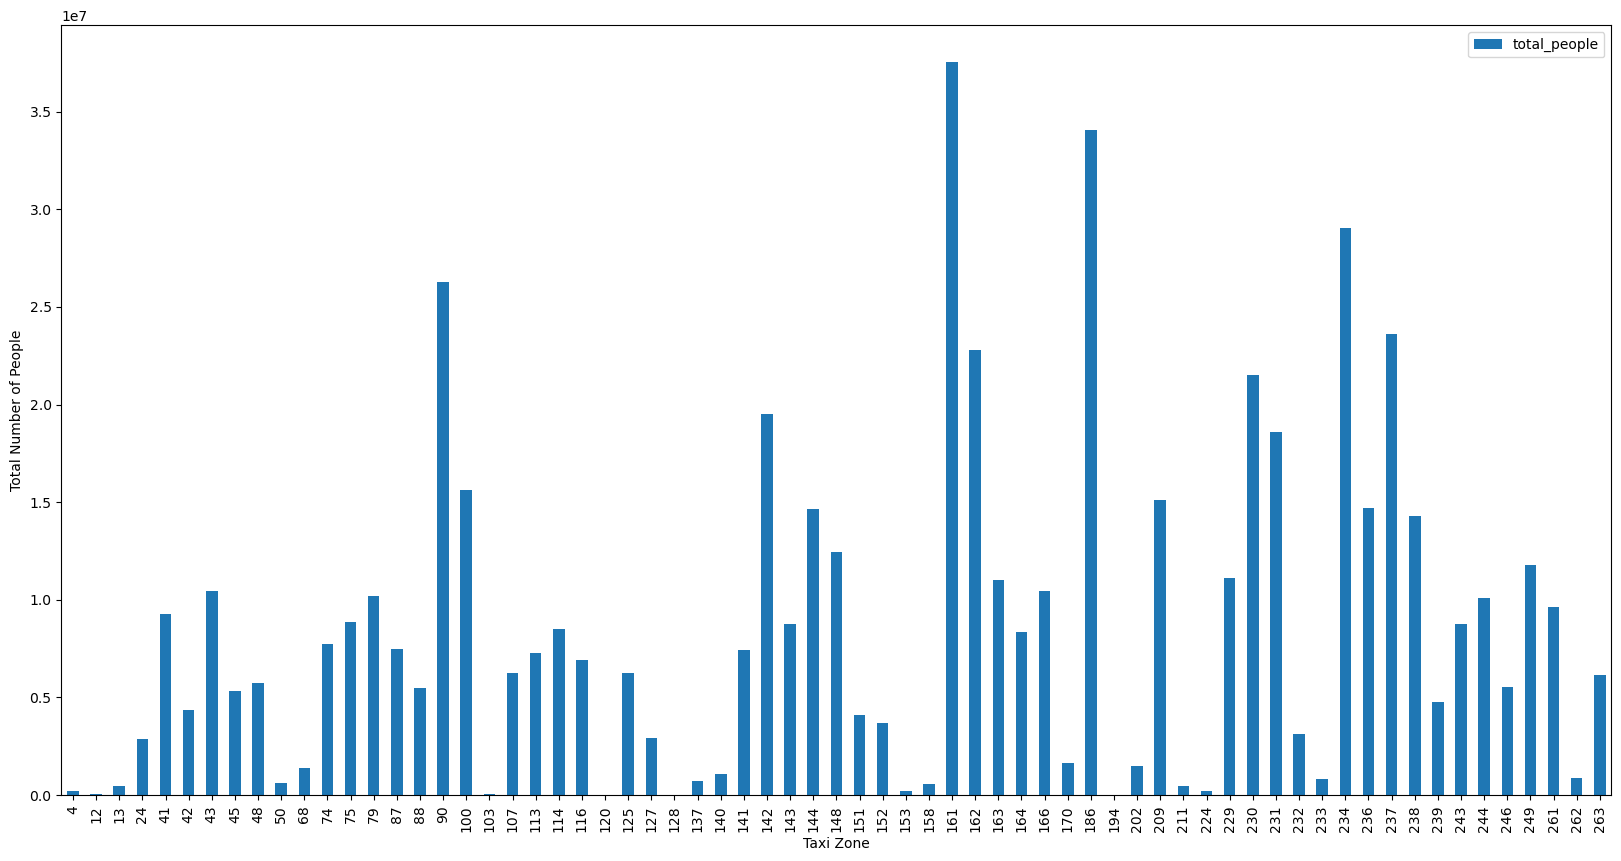

In [25]:
sum_people_loc_plot = sum_people_loc.plot(kind = "bar", figsize = (20,10))
sum_people_loc_plot.set_xlabel("Taxi Zone")
sum_people_loc_plot.set_ylabel("Total Number of People")

In [77]:
# average number of people for each location
avg_people_loc = df.groupby(df["LocationID"]).agg({"total_people" : "mean"})

Text(0.5, 1.0, 'Average Number of People for Each Taxi Zone')

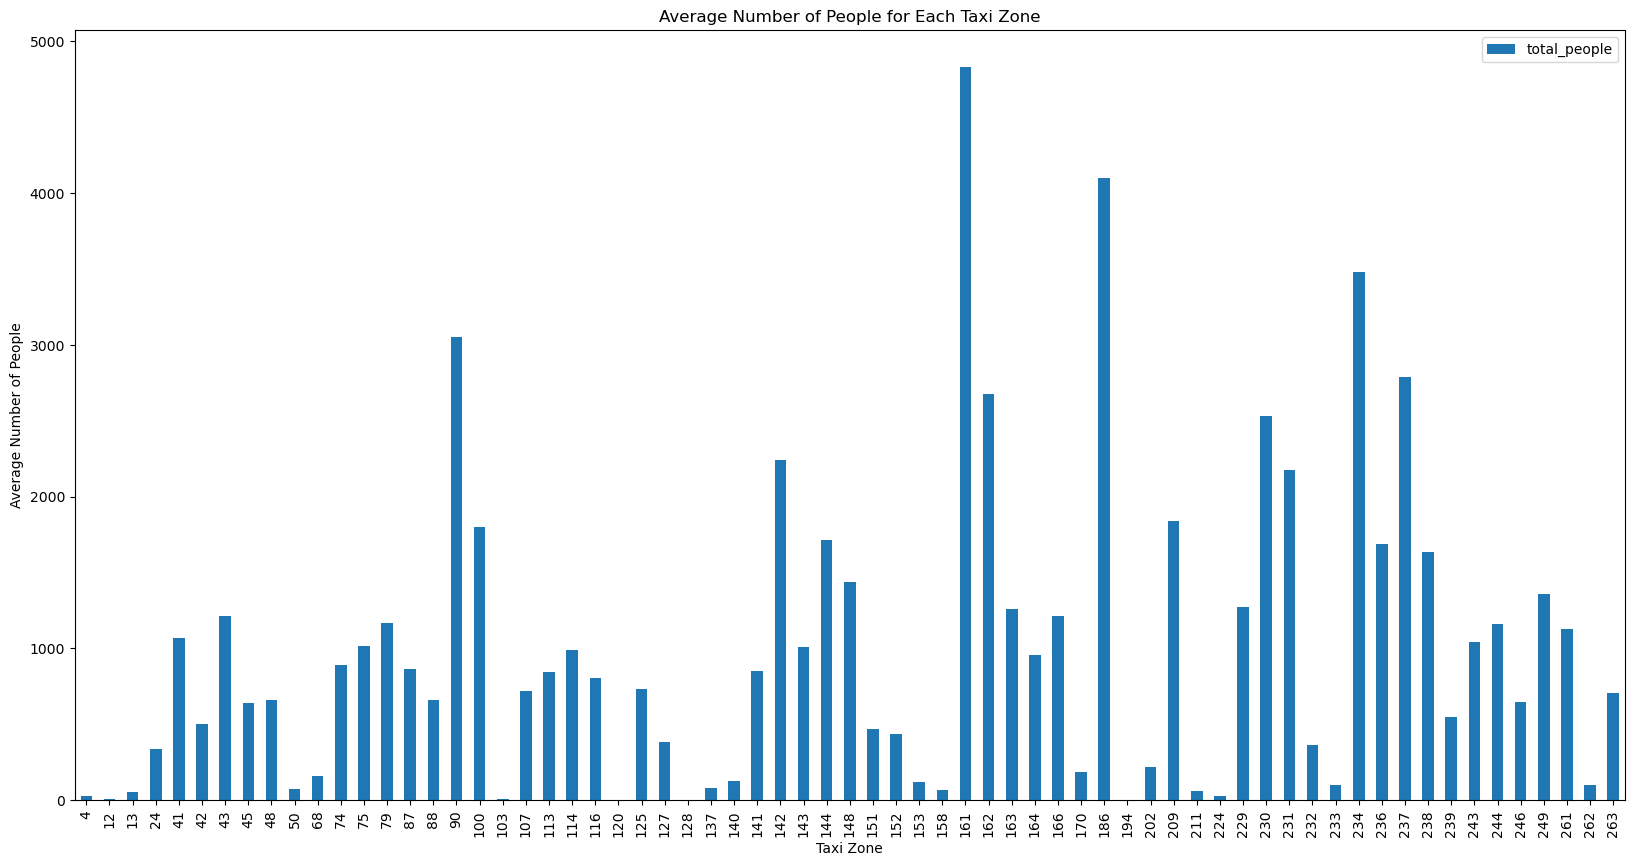

In [78]:
avg_people_loc_plot = avg_people_loc.plot(kind = "bar", figsize = (20,10))
avg_people_loc_plot.set_xlabel("Taxi Zone")
avg_people_loc_plot.set_ylabel("Average Number of People")
avg_people_loc_plot.set_title("Average Number of People for Each Taxi Zone")

## Average Temperature for Each Month, Day and Hour

In [28]:
# average temperature for each month 
avg_temp_monthly = df.groupby(df["month"]).agg({"temperature_2m (°C)" : "mean"})

Text(0.5, 1.0, 'Average Temperature for Each Month')

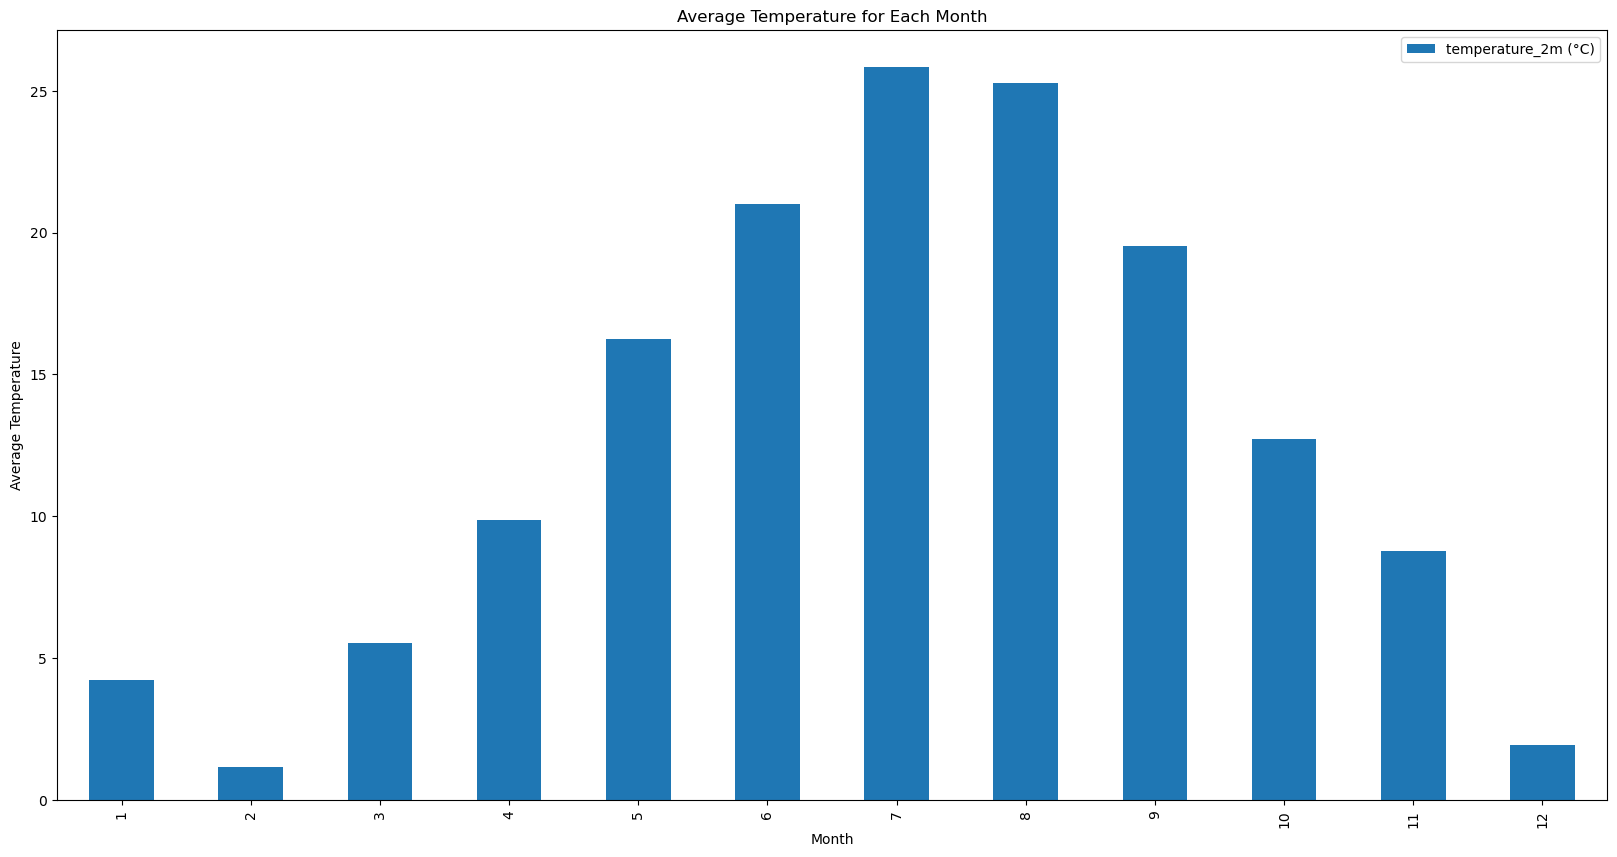

In [29]:
avg_temp_monthly_plot = avg_temp_monthly.plot(kind = "bar", figsize = (20,10))
avg_temp_monthly_plot.set_xlabel("Month")
avg_temp_monthly_plot.set_ylabel("Average Temperature")
avg_temp_monthly_plot.set_title("Average Temperature for Each Month")

In [30]:
# average temperature for each day 
avg_temp_daily = df.groupby(df["dayofweek"]).agg({"temperature_2m (°C)" : "mean"})

Text(0.5, 1.0, 'Average Temperature for Each Day')

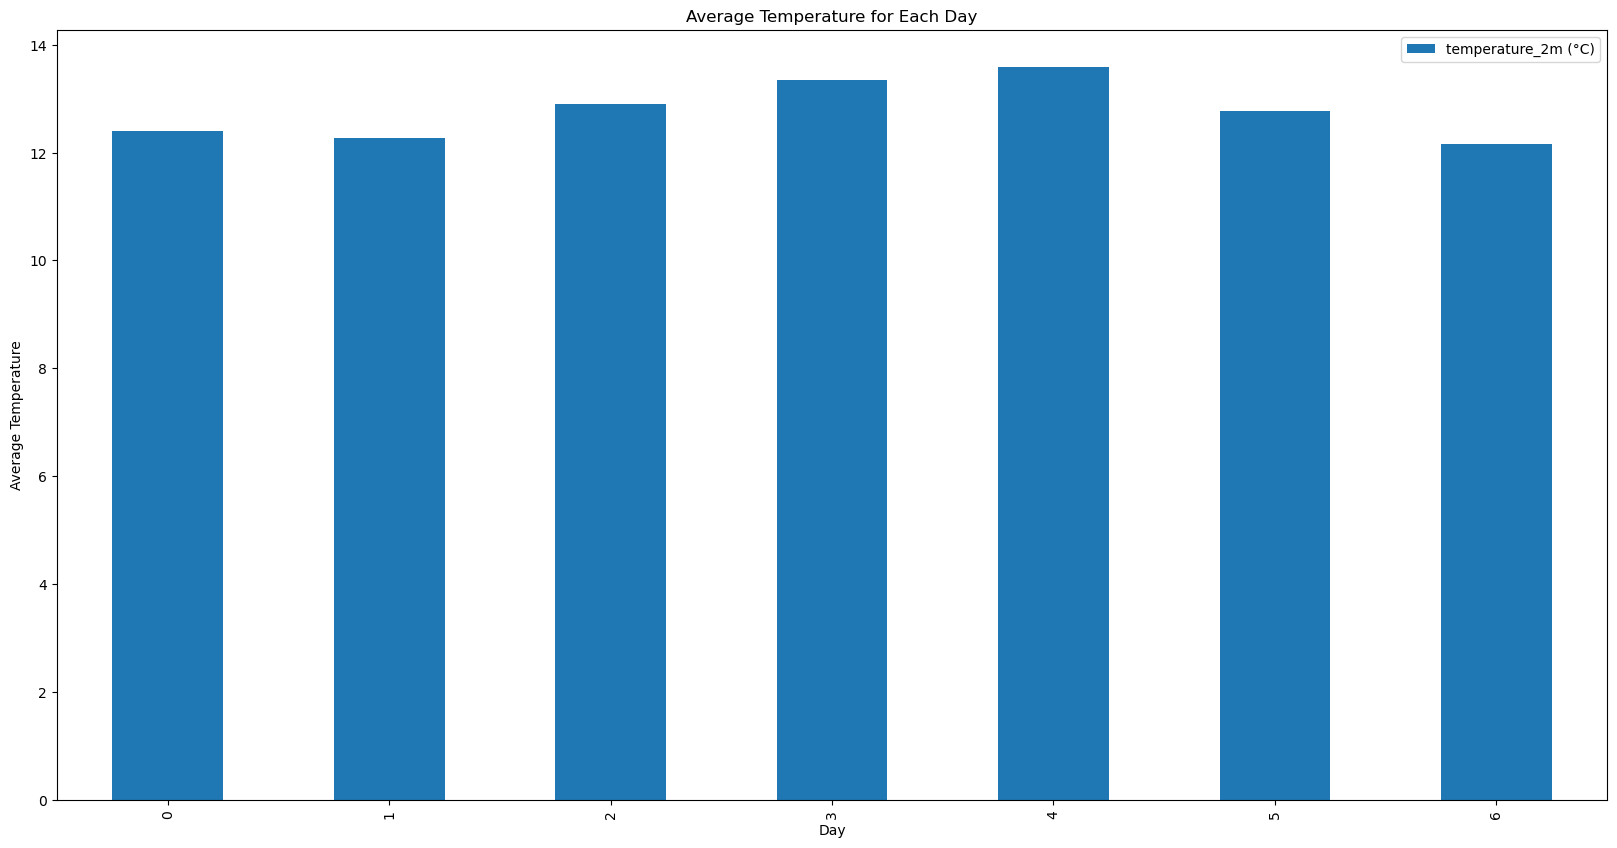

In [31]:
avg_temp_daily_plot = avg_temp_daily.plot(kind = "bar", figsize = (20,10))
avg_temp_daily_plot.set_xlabel("Day")
avg_temp_daily_plot.set_ylabel("Average Temperature")
avg_temp_daily_plot.set_title("Average Temperature for Each Day")

In [32]:
# average temperature for each hour 
avg_temp_hourly = df.groupby(df["hour"]).agg({"temperature_2m (°C)" : "mean"})

Text(0.5, 1.0, 'Average Temperature for Each Hour')

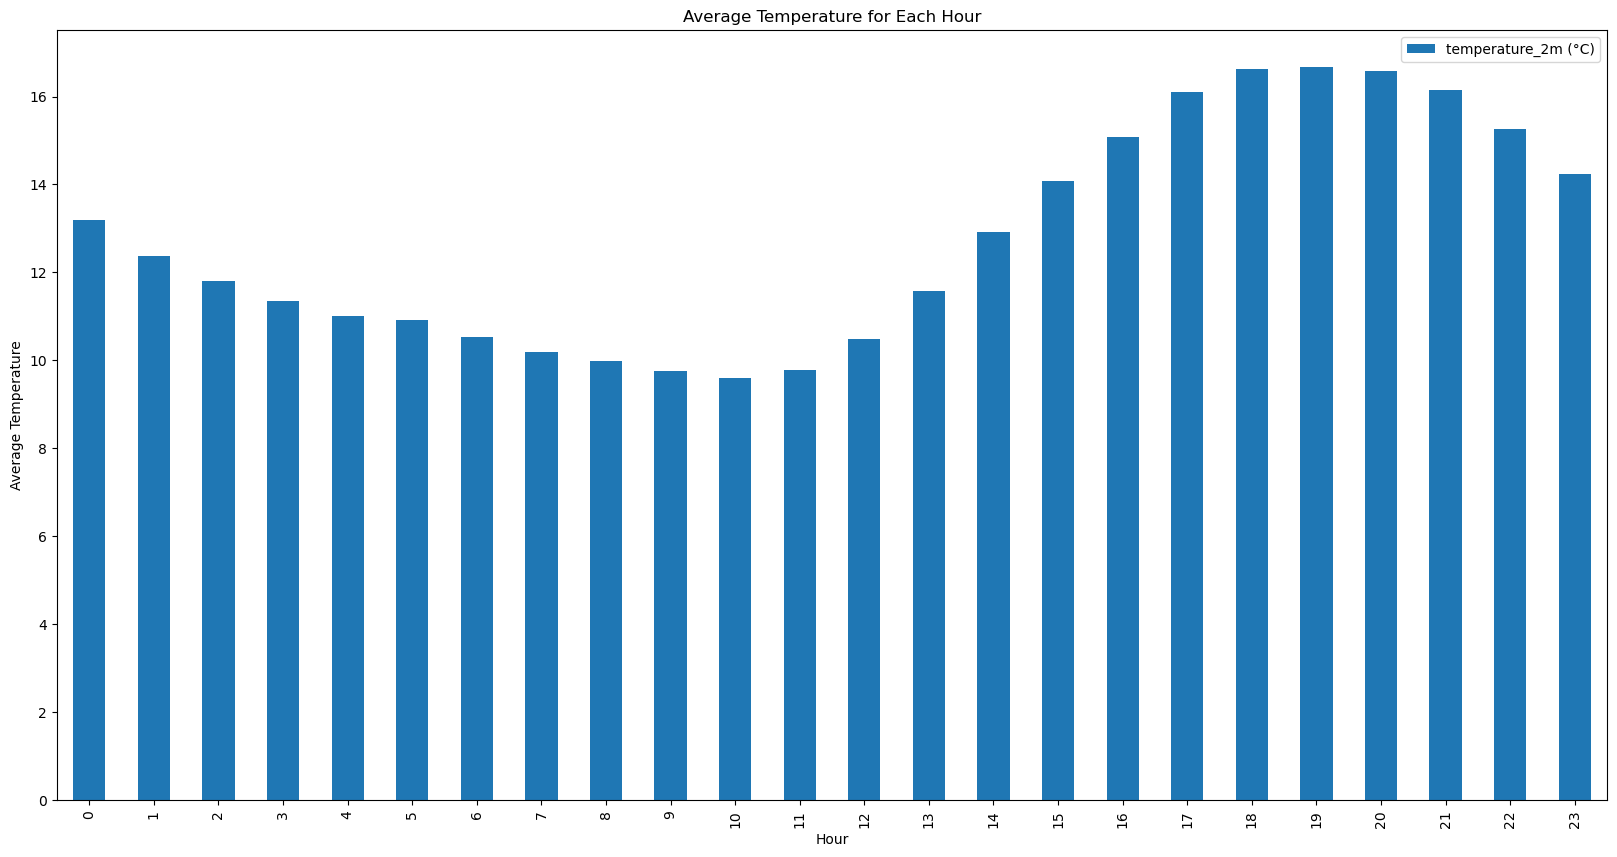

In [33]:
avg_temp_hourly_plot = avg_temp_hourly.plot(kind = "bar", figsize = (20,10))
avg_temp_hourly_plot.set_xlabel("Hour")
avg_temp_hourly_plot.set_ylabel("Average Temperature")
avg_temp_hourly_plot.set_title("Average Temperature for Each Hour")

## Rainfall for Each Month, Day and Hour

In [34]:
# average rainfall for each month 
avg_rain_monthly = df.groupby(df["month"]).agg({"rain (mm)" : "mean"})

Text(0.5, 1.0, 'Average Rainfall for Each Month')

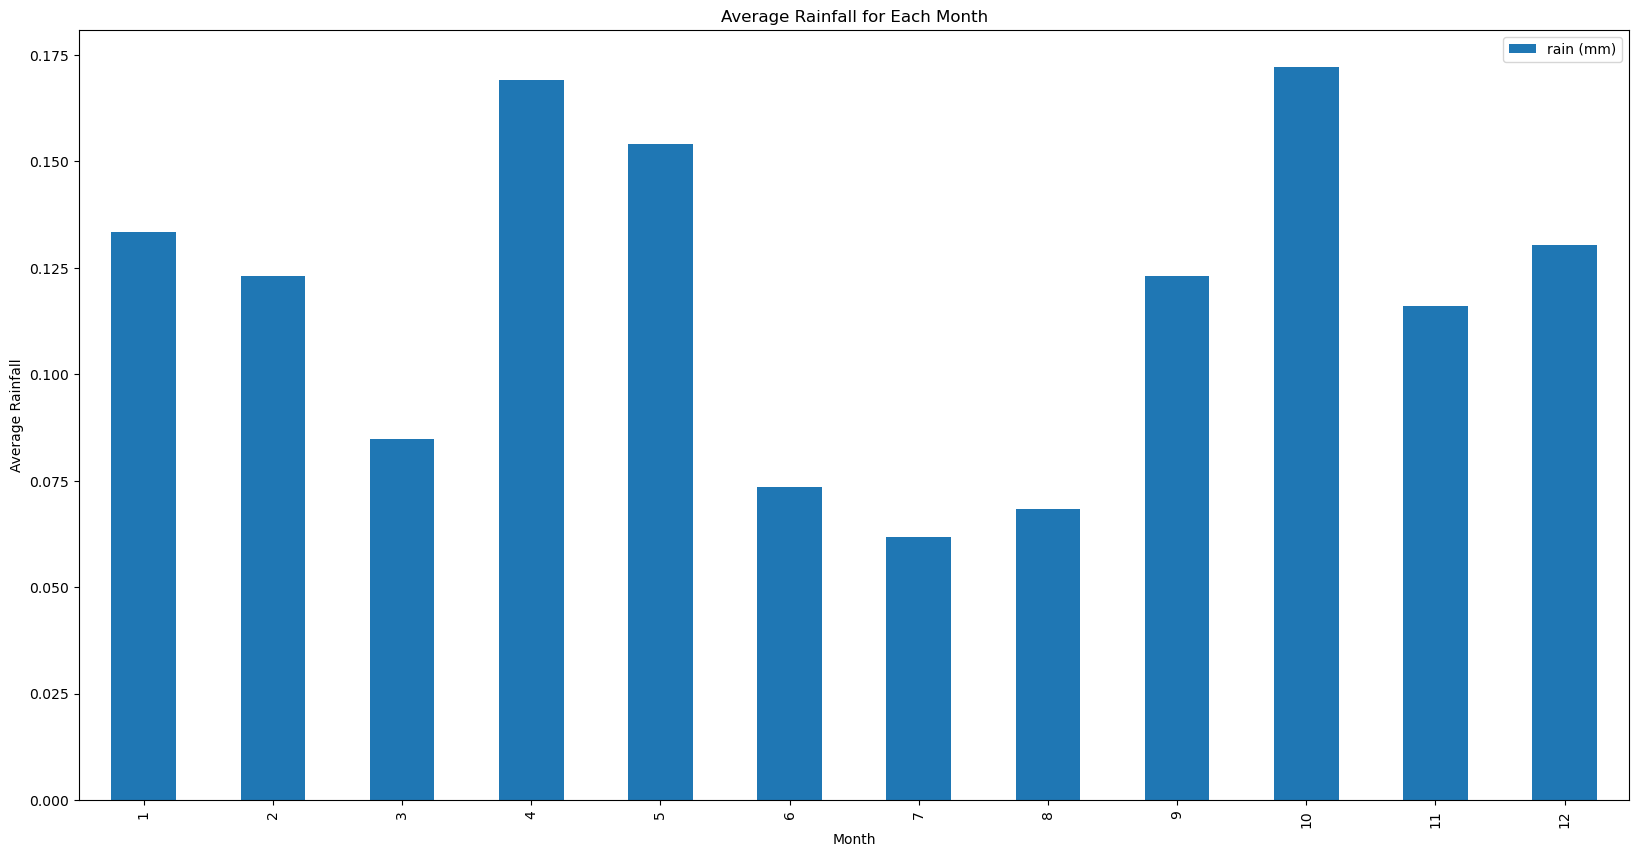

In [35]:
avg_rain_monthly_plot = avg_rain_monthly.plot(kind = "bar", figsize = (20,10))
avg_rain_monthly_plot.set_xlabel("Month")
avg_rain_monthly_plot.set_ylabel("Average Rainfall")
avg_rain_monthly_plot.set_title("Average Rainfall for Each Month")

In [36]:
# average rainfall for each day 
avg_rain_daily = df.groupby(df["dayofweek"]).agg({"rain (mm)" : "mean"})

Text(0.5, 1.0, 'Average Rainfall for Each Day')

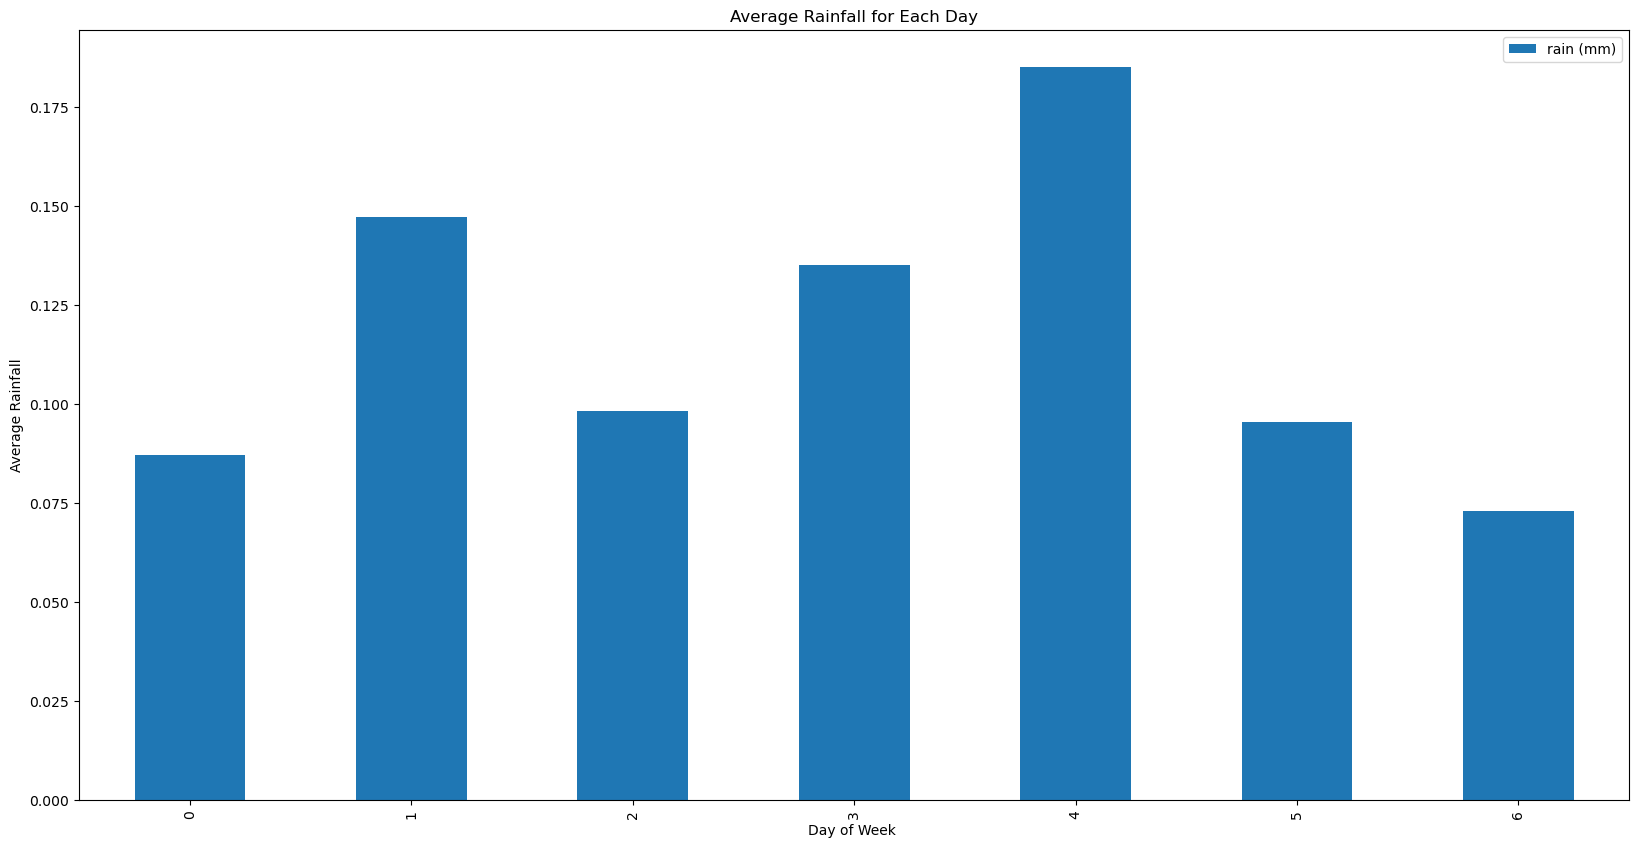

In [37]:
avg_rain_daily_plot = avg_rain_daily.plot(kind = "bar", figsize = (20,10))
avg_rain_daily_plot.set_xlabel("Day of Week ")
avg_rain_daily_plot.set_ylabel("Average Rainfall")
avg_rain_daily_plot.set_title("Average Rainfall for Each Day")

In [38]:
# average rainfall for each hour 
avg_rain_hourly = df.groupby(df["hour"]).agg({"rain (mm)" : "mean"})

Text(0.5, 1.0, 'Average Rainfall for Each Hour')

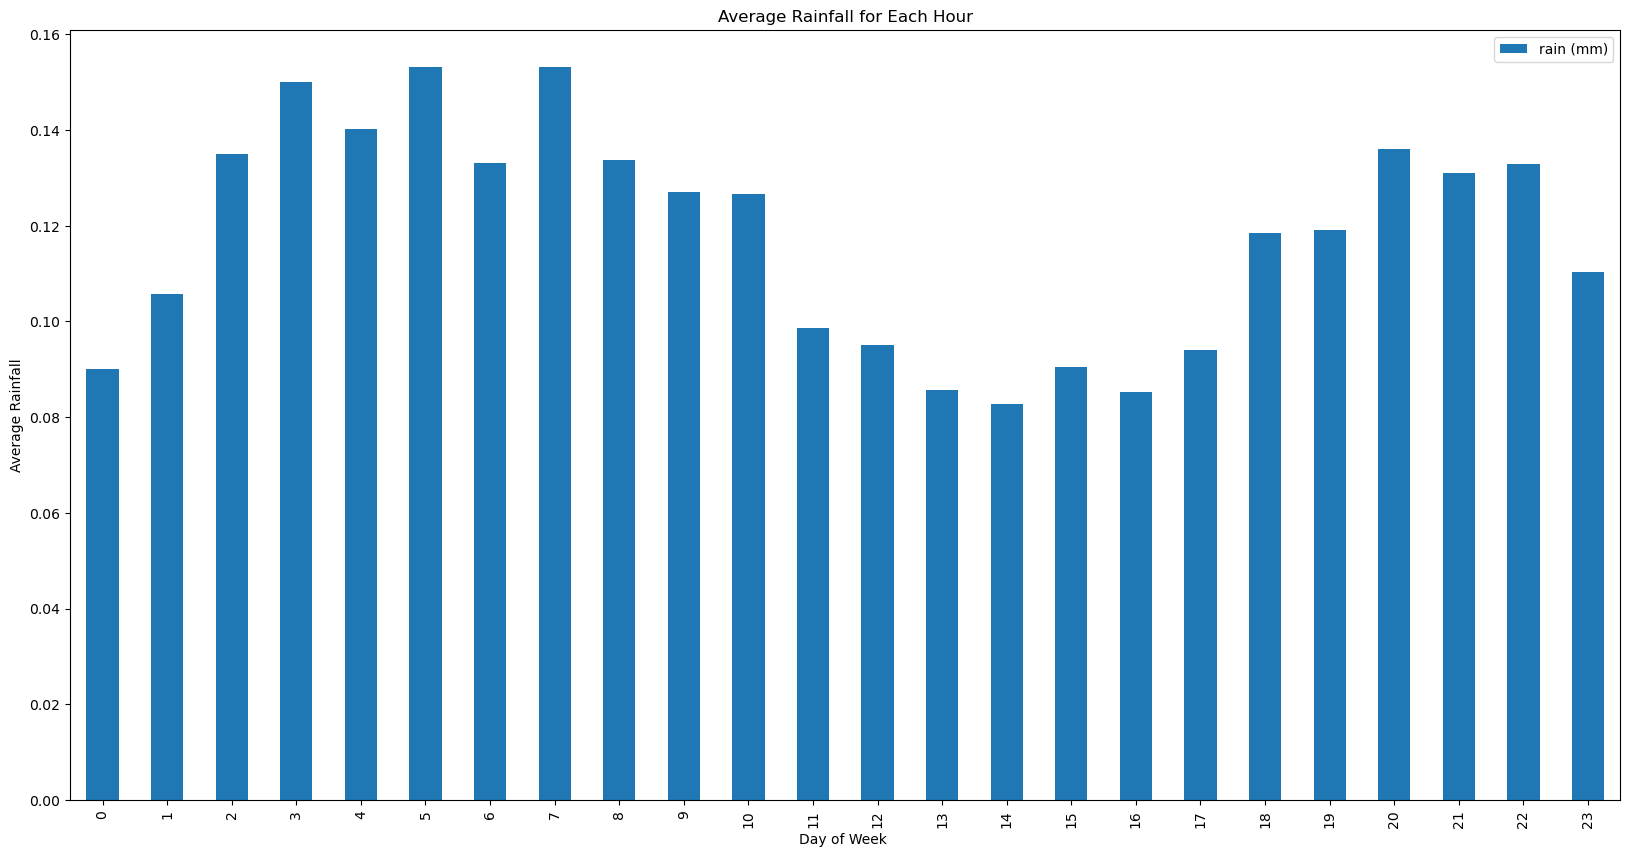

In [39]:
avg_rain_hourly_plot = avg_rain_hourly.plot(kind = "bar", figsize = (20,10))
avg_rain_hourly_plot.set_xlabel("Day of Week ")
avg_rain_hourly_plot.set_ylabel("Average Rainfall")
avg_rain_hourly_plot.set_title("Average Rainfall for Each Hour")

## Snowfall and Month, Day and Hour

In [40]:
# average snowfall for each month 
avg_snow_monthly = df.groupby(df["month"]).agg({"snowfall (cm)" : "mean"})

Text(0.5, 1.0, 'Average Snowfall for Each Month')

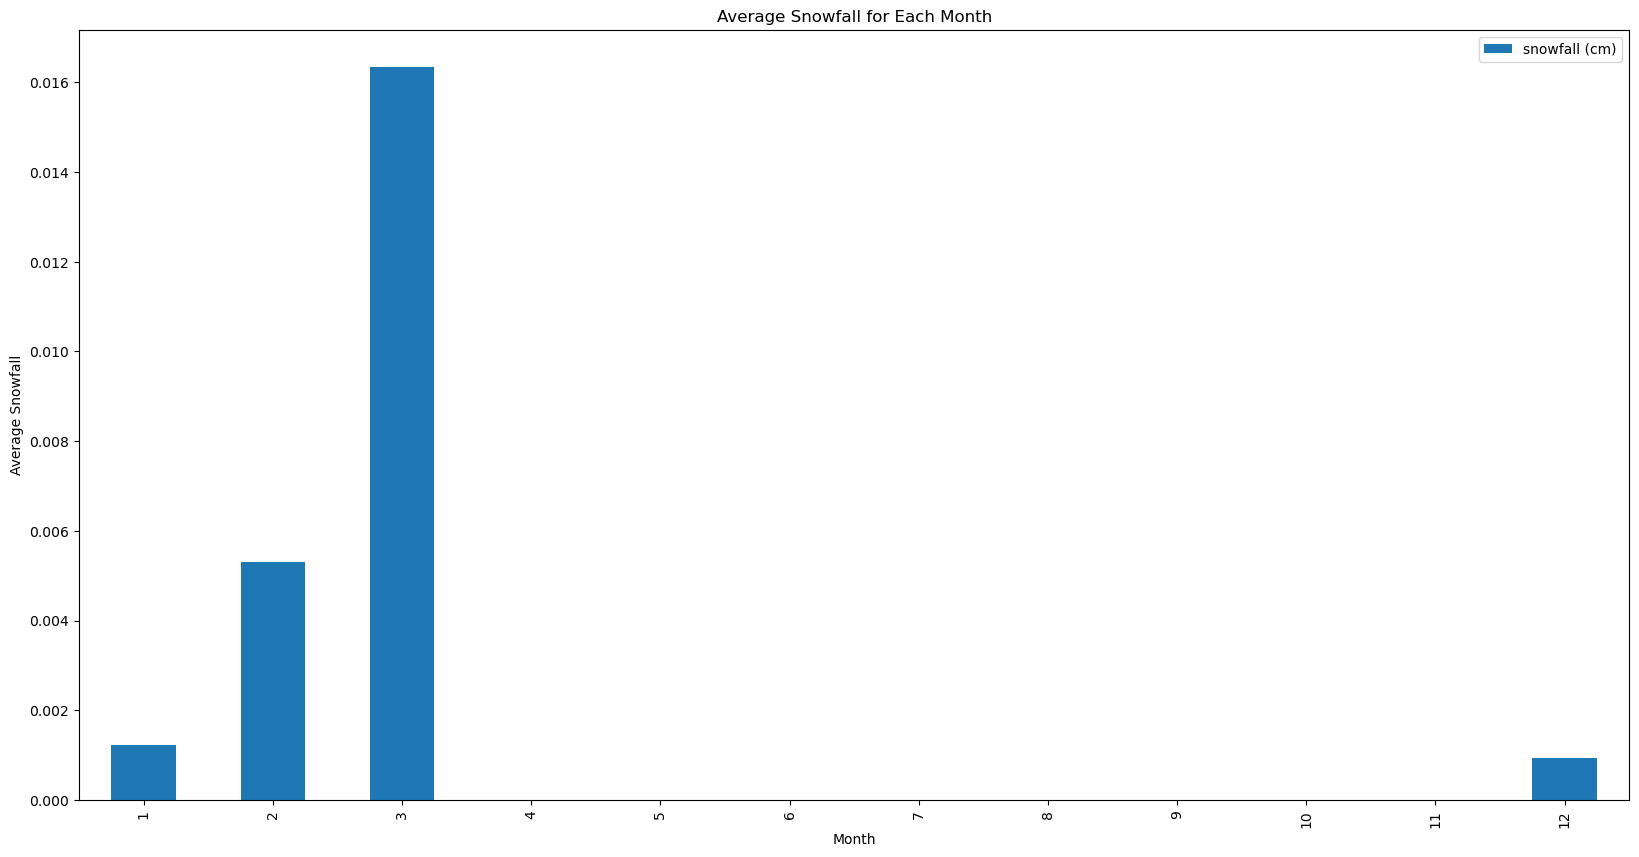

In [41]:
avg_snow_monthly_plot = avg_snow_monthly.plot(kind = "bar", figsize = (20,10))
avg_snow_monthly_plot.set_xlabel("Month")
avg_snow_monthly_plot.set_ylabel("Average Snowfall")
avg_snow_monthly_plot.set_title("Average Snowfall for Each Month")

In [42]:
# average snowfall for each day 
avg_snow_daily = df.groupby(df["dayofweek"]).agg({"snowfall (cm)" : "mean"})

Text(0.5, 1.0, 'Average Snowfall for Each Day')

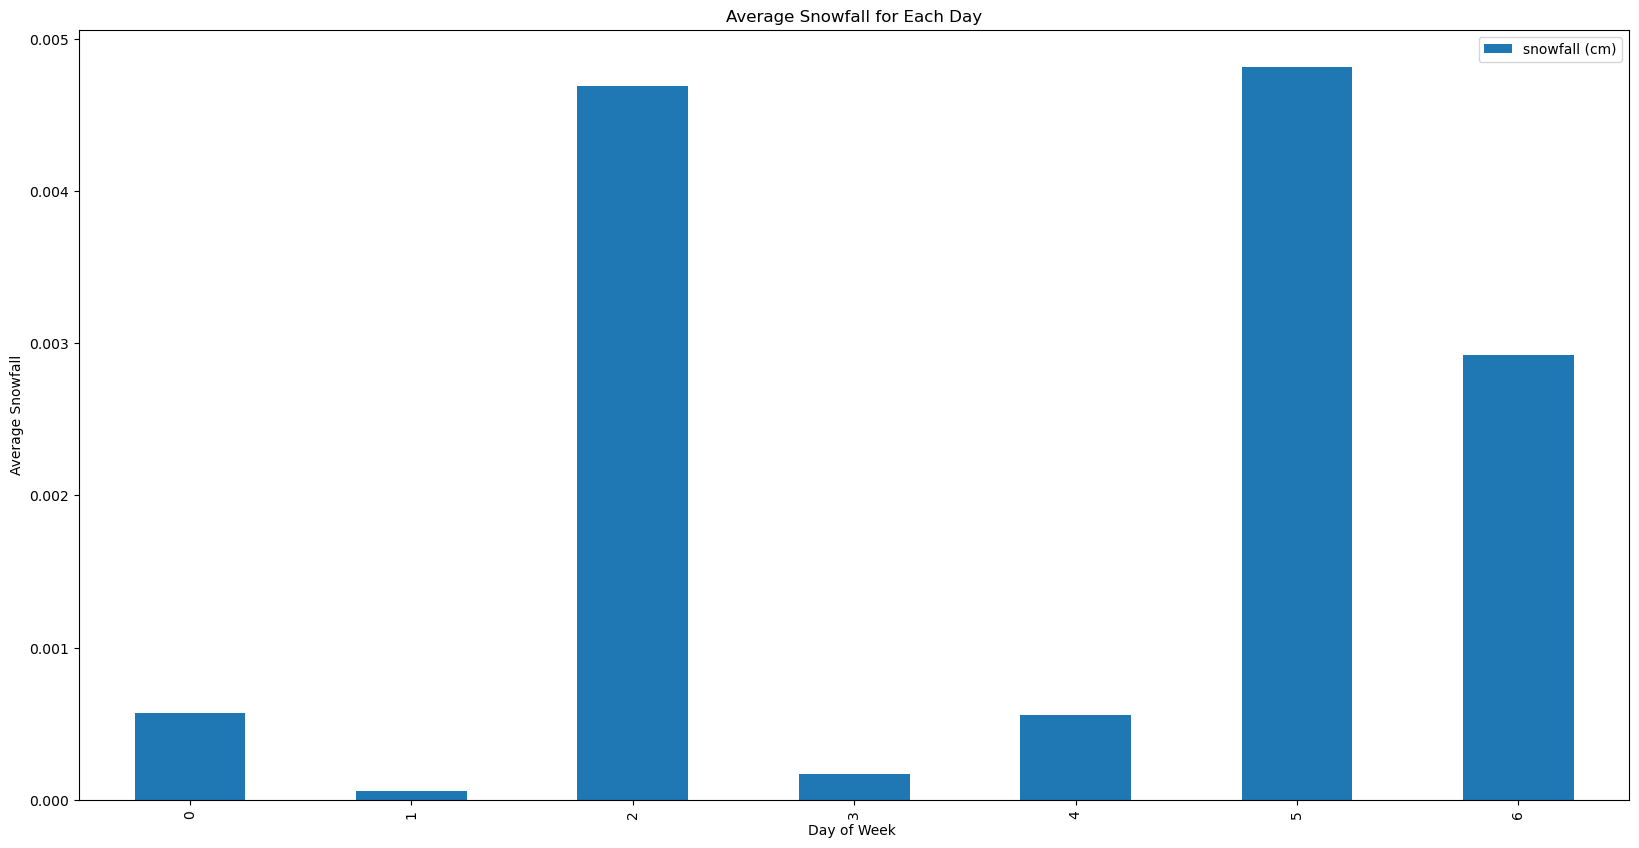

In [43]:
avg_snow_daily_plot = avg_snow_daily.plot(kind = "bar", figsize = (20,10))
avg_snow_daily_plot.set_xlabel("Day of Week ")
avg_snow_daily_plot.set_ylabel("Average Snowfall")
avg_snow_daily_plot.set_title("Average Snowfall for Each Day")

In [44]:
# average rainfall for each hour 
avg_snow_hourly = df.groupby(df["hour"]).agg({"snowfall (cm)" : "mean"})

Text(0.5, 1.0, 'Average Snowfall for Each Hour')

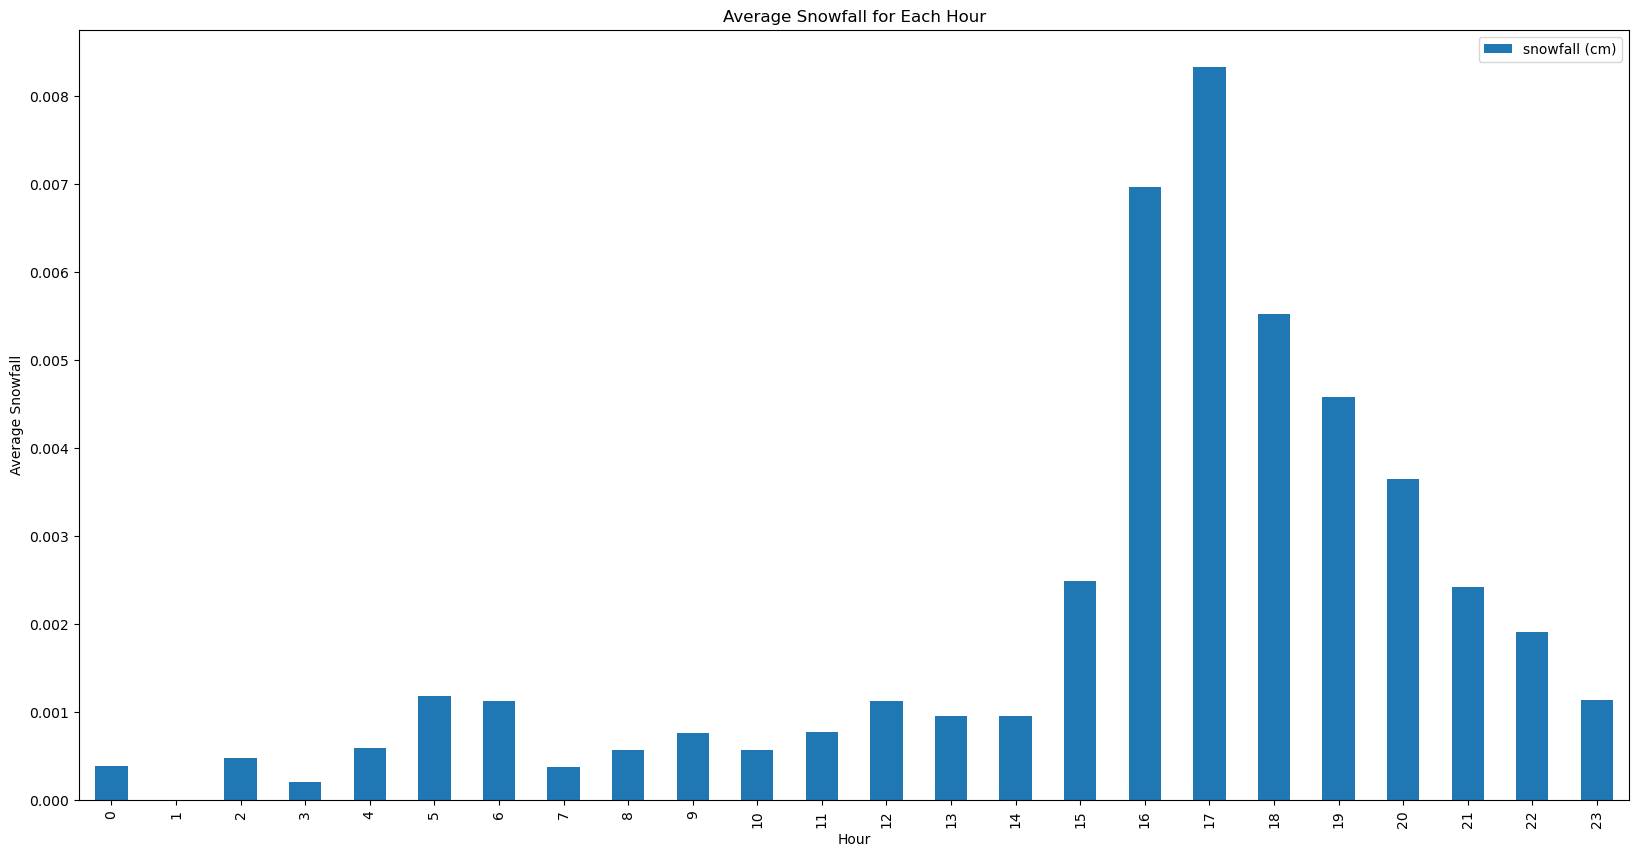

In [45]:
avg_snow_hourly_plot = avg_snow_hourly.plot(kind = "bar", figsize = (20,10))
avg_snow_hourly_plot.set_xlabel("Hour")
avg_snow_hourly_plot.set_ylabel("Average Snowfall")
avg_snow_hourly_plot.set_title("Average Snowfall for Each Hour")

## Windspeed for Each Month, Day and Hour

In [46]:
# average windspeed for each month 
avg_wind_monthly = df.groupby(df["month"]).agg({"windspeed_10m (km/h)" : "mean"})

Text(0.5, 1.0, 'Average Windspeed for Each Month')

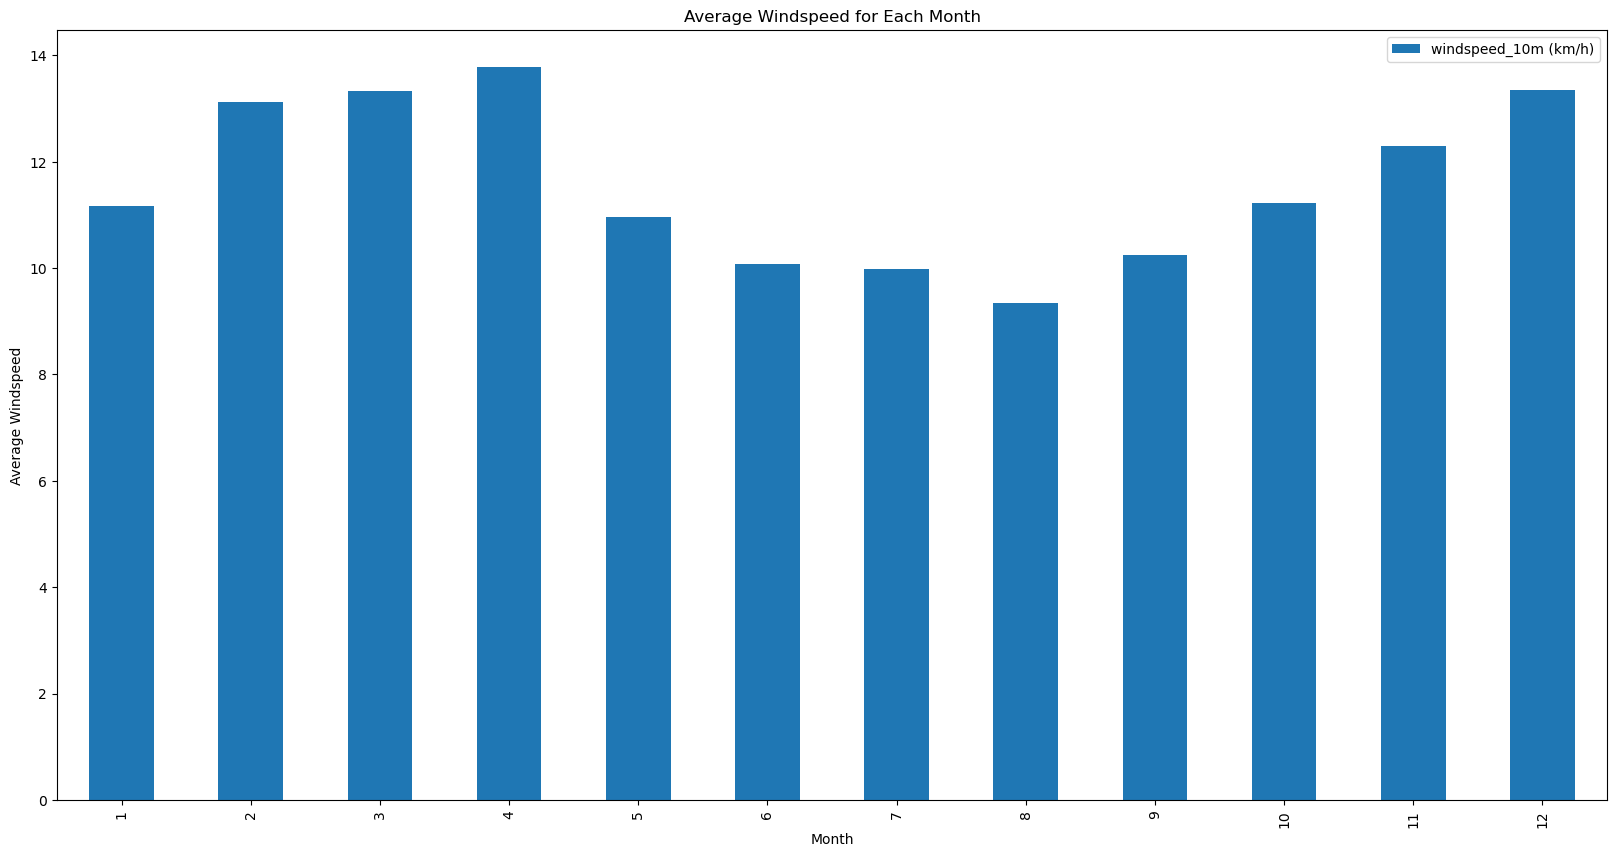

In [47]:
avg_wind_monthly_plot = avg_wind_monthly.plot(kind = "bar", figsize = (20,10))
avg_wind_monthly_plot.set_xlabel("Month")
avg_wind_monthly_plot.set_ylabel("Average Windspeed")
avg_wind_monthly_plot.set_title("Average Windspeed for Each Month")

In [48]:
# average windspeed for each day 
avg_wind_daily = df.groupby(df["dayofweek"]).agg({"windspeed_10m (km/h)" : "mean"})

Text(0.5, 1.0, 'Average Windspeed for Each Day')

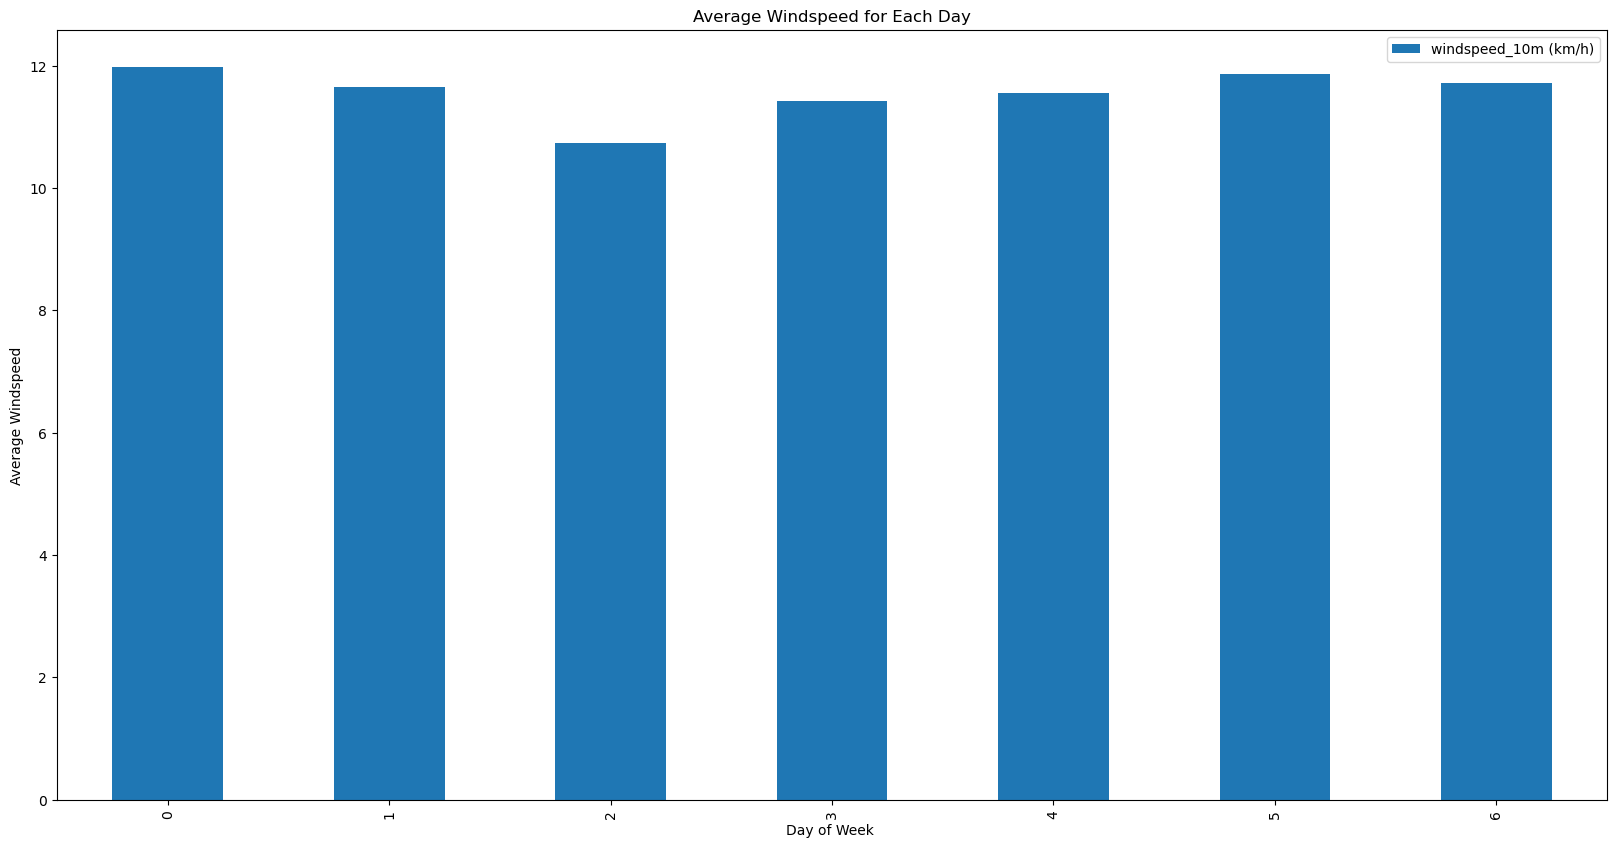

In [49]:
avg_wind_daily_plot = avg_wind_daily.plot(kind = "bar", figsize = (20,10))
avg_wind_daily_plot.set_xlabel("Day of Week ")
avg_wind_daily_plot.set_ylabel("Average Windspeed")
avg_wind_daily_plot.set_title("Average Windspeed for Each Day")

In [50]:
# average windspeed for each hour 
avg_wind_hourly = df.groupby(df["hour"]).agg({"windspeed_10m (km/h)" : "mean"})

Text(0.5, 1.0, 'Average Windspeed for Each Hour')

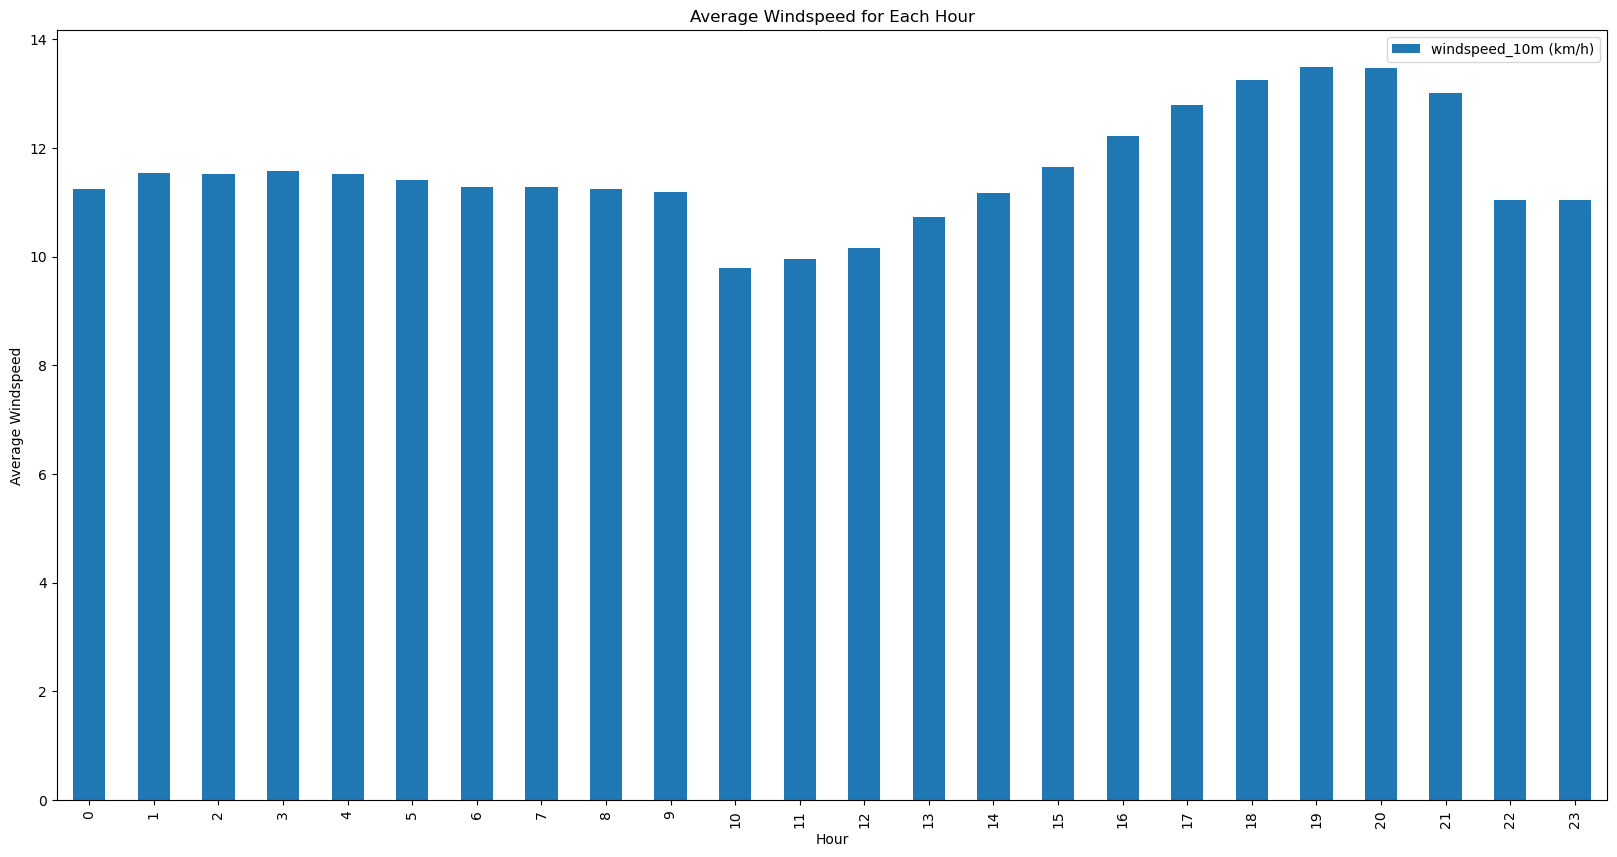

In [51]:
avg_wind_hourly_plot = avg_wind_hourly.plot(kind = "bar", figsize = (20,10))
avg_wind_hourly_plot.set_xlabel("Hour")
avg_wind_hourly_plot.set_ylabel("Average Windspeed")
avg_wind_hourly_plot.set_title("Average Windspeed for Each Hour")

## Scatter Plots Between Total People and Weather Variables

## Total Passenger and Temperature

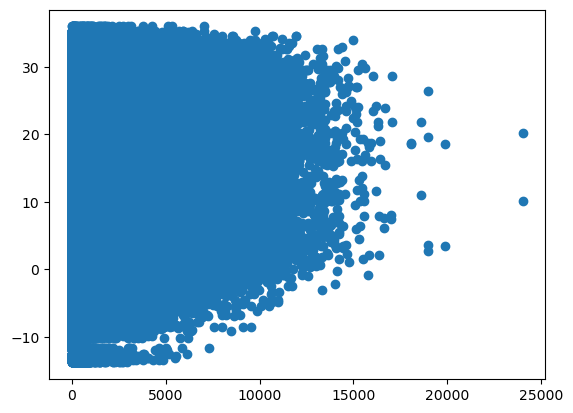

In [52]:
plt.scatter(df["total_people"], df["temperature_2m (°C)"])

In [53]:
temp_correlation = df["total_people"].corr(df["temperature_2m (°C)"])
print(f"the correlation between temperature and total people is: {temp_correlation}")

the correlation between temperature and total people is: 0.044216496731237655


## Total Passenger and Rainfall

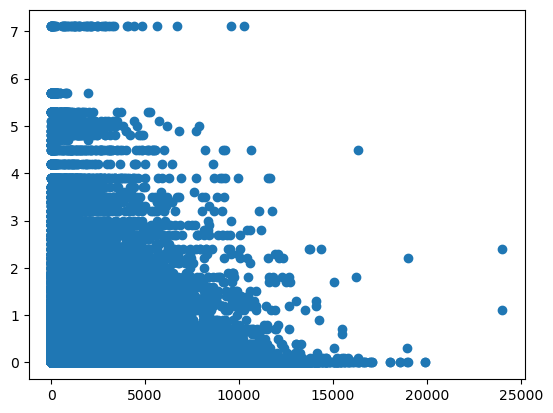

In [54]:
plt.scatter(df["total_people"], df["rain (mm)"])

In [55]:
rain_correlation = df["total_people"].corr(df["rain (mm)"])
print(f"the correlation between rainfall and total people is: {rain_correlation}")

the correlation between rainfall and total people is: -0.008840738668735103


## Total Passenger and Snowfall

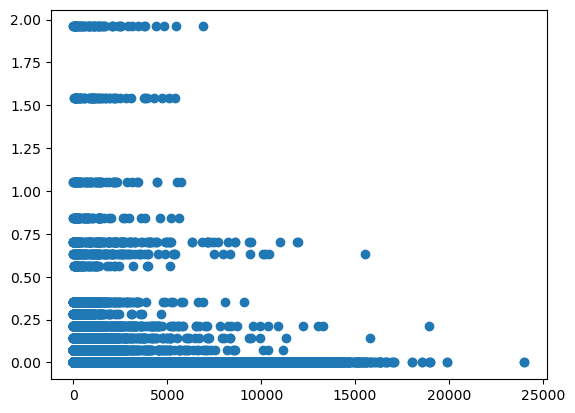

In [56]:
plt.scatter(df["total_people"], df["snowfall (cm)"])

In [57]:
snow_correlation = df["total_people"].corr(df["snowfall (cm)"])
print(f"the correlation between snowfall and total people is: {snow_correlation}")

the correlation between snowfall and total people is: 0.008769257573723087


## Total Passengers and Windspeed

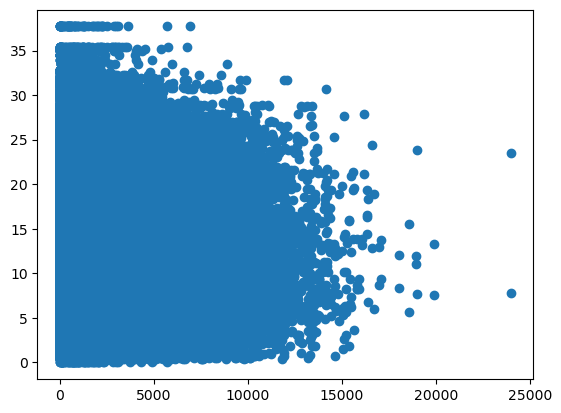

In [58]:
plt.scatter(df["total_people"], df["windspeed_10m (km/h)"])

In [59]:
# correlation
wind_correlation = df["total_people"].corr(df["windspeed_10m (km/h)"])
print(f"the correlation between wind speed and total people is: {wind_correlation}")

the correlation between wind speed and total people is: 0.011875987919964527


##  Correlation Matrix of Total People and Weather

In [60]:
# filter for only total people temperature columns
weather_df = df.filter(["total_people", "temperature_2m (°C)", "snowfall (cm)", "rain (mm)", "windspeed_10m (km/h)"], axis = 1)

In [61]:
# reseting index
weather_df.reset_index()

,index,total_people,temperature_2m (°C),snowfall (cm),rain (mm),windspeed_10m (km/h)
0,0,39.0,-5.8,0.0,0.0,10.3
1,1,14.0,-7.1,0.0,0.0,11.0
2,2,8.0,-8.6,0.0,0.0,11.5
3,3,8.0,-9.8,0.0,0.0,12.0
4,4,259.0,-12.0,0.0,0.0,9.8
...,...,...,...,...,...,...
541005,541005,4.0,1.7,0.0,0.1,7.2
541006,541006,1.0,1.9,0.0,0.0,10.4
541007,541007,3.0,2.8,0.0,0.0,11.5
541008,541008,1.0,4.4,0.0,0.0,10.6


In [62]:
weather_correlation = weather_df.corr()

<AxesSubplot:>

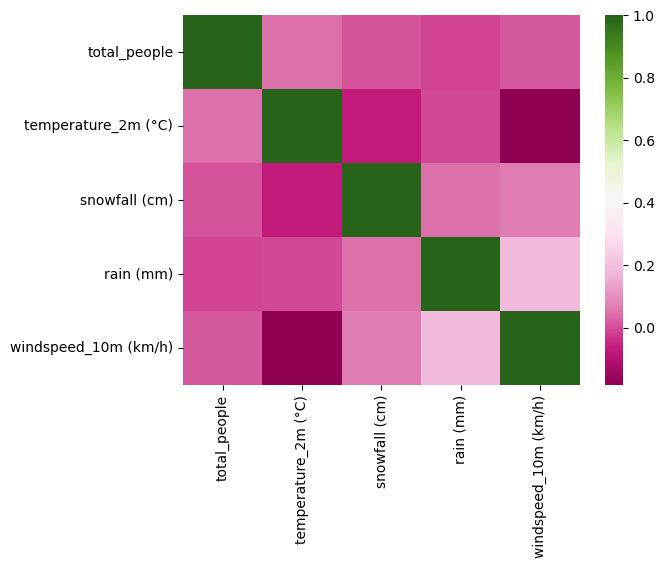

In [63]:
sns.heatmap(weather_correlation, cmap = "PiYG")

# Correlation Matrix of Total People and Day, Month and Hour

In [71]:
# filter for only total people, day, month and hour
day_month_hour = df.filter(["total_people", "dayofweek", "month", "hour"], axis = 1)


In [72]:
# reseting index
day_month_hour.reset_index()

,index,total_people,dayofweek,month,hour
0,0,39.0,1,2,0
1,1,14.0,1,2,1
2,2,8.0,1,2,2
3,3,8.0,1,2,3
4,4,259.0,1,2,7
...,...,...,...,...,...
541005,541005,4.0,1,1,14
541006,541006,1.0,1,1,15
541007,541007,3.0,1,1,16
541008,541008,1.0,1,1,18


In [73]:
correlation = day_month_hour.corr()

<AxesSubplot:>

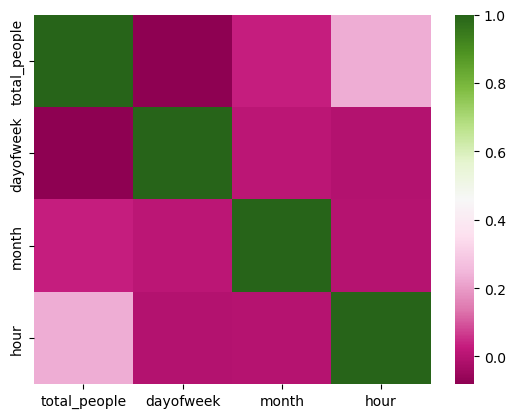

In [74]:
sns.heatmap(correlation, cmap = "PiYG")